<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Assignment 1] Select features and categories for practice

In [9]:
#Load iris dataset and import into pandas

from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
x = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.DataFrame(data=data.target, columns={'Species'})
df = pd.concat([x,y], axis = 1)
#print(data.target_names)

# select versicolor and virginica as classes
# select sepal_length and petal_length as features 

data_bc = df[df['Species'] > 0].iloc[:, [1,3, 4]]
print (data_bc)

     sepal width (cm)  petal width (cm)  Species
50                3.2               1.4        1
51                3.2               1.5        1
52                3.1               1.5        1
53                2.3               1.3        1
54                2.8               1.5        1
..                ...               ...      ...
145               3.0               2.3        2
146               2.5               1.9        2
147               3.0               2.0        2
148               3.4               2.3        2
149               3.0               1.8        2

[100 rows x 3 columns]


[Problem 2] Data Analysis

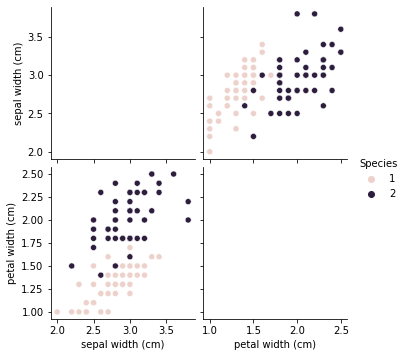

In [10]:
import seaborn as sns
sns.pairplot(data_bc, hue="Species", diag_kind="scatter")

[Problem 3] Separation of preprocessing / training data and verification data

In [18]:
from sklearn.model_selection import train_test_split
X = data_bc.iloc[:,:-1]
print (X.shape)
Y = data_bc.iloc[:,-1]
print (Y.shape)
#splitting dataset into 75% training set and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print (X_train.shape)
print (y_train.shape)

(100, 2)
(100,)
(75, 2)
(75,)


[Problem 4] Pretreatment / standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print (X_train)
scaler.fit(X_train)
#transform both X_train and X_test
X_train_standard= scaler.transform(X_train)
X_test_standard= scaler.transform(X_test)
print (X_train_standard)

     sepal width (cm)  petal width (cm)
65                3.1               1.4
90                2.6               1.2
146               2.5               1.9
59                2.7               1.4
122               2.8               2.0
..                ...               ...
110               3.2               2.0
121               2.8               2.0
64                2.9               1.3
142               2.7               1.9
101               2.7               1.9

[75 rows x 2 columns]
[[ 0.54497204 -0.74414037]
 [-1.05162574 -1.21117407]
 [-1.37094529  0.42344389]
 [-0.73230618 -0.74414037]
 [-0.41298662  0.65696074]
 [ 0.22565249 -0.51062352]
 [-0.09366707 -0.97765722]
 [ 0.22565249  1.3575113 ]
 [-0.09366707 -0.51062352]
 [ 0.8642916   1.3575113 ]
 [-0.41298662 -0.97765722]
 [ 0.22565249  0.18992704]
 [ 0.8642916   1.3575113 ]
 [ 1.50293071 -0.27710666]
 [ 0.22565249 -0.51062352]
 [-0.41298662 -0.97765722]
 [ 0.22565249 -0.51062352]
 [-1.69026485 -1.67820777]
 [ 0.225652

[Problem 5] Learning and estimation

In [63]:
from sklearn.neighbors import KNeighborsClassifier
# nn  = 5 
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_standard, y_train)
prediction_5 = neigh_5.predict(X_test_standard)

# nn  = 3
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_standard, y_train)
prediction_3 = neigh_3.predict(X_test_standard)

print ("Prediction result (nn=5): " + str(prediction_5))
print ("Prediction result (nn=3): " + str(prediction_3))
print ("Actual result (nn=3): " + str(y_test.tolist()))

Prediction result (nn=5): [1 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 1]
Prediction result (nn=3): [1 2 2 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1]
Actual result (nn=3): [2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2]


[Problem 6] Evaluation

In [64]:
# Calculate 4 types of indicators using scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluation result for nn=5 classifier 
# Accuracy classification score.
accuracy_5 = accuracy_score(y_test, prediction_5)
# Compute precision. The precision is the ratio tp / (tp + fp). The best value is 1 and the worst value is 0.
precision_5 = precision_score(y_test, prediction_5, average='macro')
#Compute recall. The recall is the ratio tp / (tp + fn). The best value is 1 and the worst value is 0.
recall_5 = recall_score(y_test, prediction_5, average='macro') 
# The F1 score can be interpreted as a harmonic mean of the precision and recall. best value at 1 and worst score at 0
f1_5 = f1_score(y_test, prediction_5, average='macro')

# Evaluation result for nn=3 classifier 
accuracy_3 = accuracy_score(y_test, prediction_3)
precision_3 = precision_score(y_test, prediction_3, average='macro')
recall_3 = recall_score(y_test, prediction_3, average='macro')
f1_3 = f1_score(y_test, prediction_3, average='macro')

d = {'accuracy':[accuracy_5, accuracy_3], 'precision':[precision_5, precision_3], 'recall':[recall_5, recall_3], 'F1 score': [f1_5, f1_3]}
evaluation_table = pd.DataFrame(data=d, index=['nn=5', 'nn=3'])
print (evaluation_table)

      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847


Confusion matrix for nn = 5
Confusion matrix for nn = 3


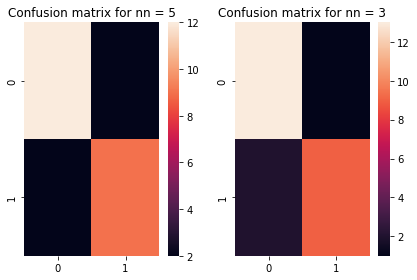

In [65]:
#Display the confusion matrix using scikit-learn
from sklearn.metrics import confusion_matrix
print ('Confusion matrix for nn = 5')
confusion_5 = confusion_matrix(y_test, prediction_5)
from matplotlib import pyplot as plt
f, axes = plt.subplots(1, 2)
sns.heatmap(confusion_5,ax=axes[0]).set(title = 'Confusion matrix for nn = 5')
print ('Confusion matrix for nn = 3')
confusion_3 = confusion_matrix(y_test, prediction_3)
sns.heatmap(confusion_3,ax=axes[1]).set(title = 'Confusion matrix for nn = 3')
plt.tight_layout()
plt.show()

[Question 7] Visualization

(75,)


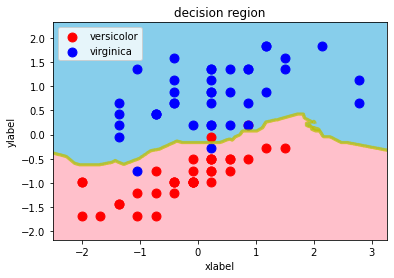

In [147]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
print(y_train.shape)
decision_region(X_train_standard, y_train, neigh_5, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

[Problem 8] Learning other methods

Model 1: Logistic regression

In [73]:
# Logistic regression tuning hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946429 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.937500 (0.076564) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.937500 (0.076564) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.933333 (0.076450) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.895238 (0.098429) wit

In [91]:
# logistic regression classifier
model_logistic = LogisticRegression(C = 1.0, solver = 'newton-cg').fit(X_train_standard, y_train)
prediction_LR = model_logistic.predict(X_test_standard)

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table (prediction_result, model_name, table_name):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

evaluation_table = calculate_metrics_add_to_table(prediction_LR, 'LR', evaluation_table)

print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847
LR        0.92   0.918831  0.918831  0.918831


Model 2: Support Vector Machine (SVM)

In [96]:
# SVM model tuning 
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.955952 using {'C': 50, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.521429 (0.045737) with: {'C': 50, 'gamma': 0.0001, 'kernel': 'poly'}
0.897619 (0.091512) with: {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.564881 (0.077903) with: {'C': 50, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.521429 (0.045737) with: {'C': 50, 'gamma': 0.001, 'kernel': 'poly'}
0.951190 (0.064374) with: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.955952 (0.062497) with: {'C': 50, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.521429 (0.045737) with: {'C': 50, 'gamma': 0.01, 'kernel': 'poly'}
0.946429 (0.065854) with: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
0.946429 (0.065854) with: {'C': 50, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.893452 (0.110415) with: {'C': 50, 'gamma': 0.1, 'kernel': 'poly'}
0.936905 (0.077115) with: {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
0.883929 (0.098322) with: {'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.946429 (0.073338) with: {'C': 50, 'gamma': 1, 'kernel': 'poly'}
0.923214 (0.076896) with

In [98]:
# SVM classifier
model_SVC = SVC(C=50, gamma=0.001, kernel = 'sigmoid').fit(X_train_standard, y_train)
prediction_SVC = model_SVC.predict(X_test_standard)

evaluation_table = calculate_metrics_add_to_table(prediction_SVC, 'SVC', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847
LR        0.92   0.918831  0.918831  0.918831
SVM       0.92   0.937500  0.909091  0.916667


Model 3: Decision tree

In [100]:
# Decision tuning hyperparameters

from sklearn import tree

# define models and parameters
model = tree.DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
# define grid search
grid = dict(criterion=criterion, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.923810 using {'criterion': 'gini', 'max_depth': 2}
0.923810 (0.084884) with: {'criterion': 'gini', 'max_depth': 2}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 4}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 6}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 8}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 10}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 12}
0.923810 (0.084884) with: {'criterion': 'entropy', 'max_depth': 2}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 4}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 6}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 8}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 10}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 12}


In [102]:
# Decision tree classifier
model_DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=2).fit(X_train_standard, y_train)
prediction_DT = model_DT.predict(X_test_standard)

evaluation_table = calculate_metrics_add_to_table(prediction_DT, 'DT', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847
LR        0.92   0.918831  0.918831  0.918831
SVM       0.92   0.937500  0.909091  0.916667
DT        0.92   0.937500  0.909091  0.916667


Model 4: Random Forest

In [103]:
#Random forest tuning
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.923810 using {'max_features': 'log2', 'n_estimators': 10}
0.891667 (0.084129) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.923214 (0.076896) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.923214 (0.076896) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.923810 (0.076450) with: {'max_features': 'log2', 'n_estimators': 10}
0.923214 (0.076896) with: {'max_features': 'log2', 'n_estimators': 100}
0.923214 (0.076896) with: {'max_features': 'log2', 'n_estimators': 1000}


In [104]:
# Random forest classifier
model_RF = RandomForestClassifier(n_estimators=10, max_features = 'log2').fit(X_train_standard, y_train)
prediction_RF = model_RF.predict(X_test_standard)

evaluation_table = calculate_metrics_add_to_table(prediction_RF, 'RF', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847
LR        0.92   0.918831  0.918831  0.918831
SVM       0.92   0.937500  0.909091  0.916667
DT        0.92   0.937500  0.909091  0.916667
RF        0.88   0.883333  0.873377  0.876847


In [105]:
print ("Final result of standardized data")
print (evaluation_table)
print ("As we can see, the best models are LR, SVM, DT. Because of the few features, Random forest did not provide good results. Also, DT and SVM performed same result in 4 metrics.")

Final result of standardized data
      accuracy  precision    recall  F1 score
nn=5      0.84   0.837662  0.837662  0.837662
nn=3      0.88   0.883333  0.873377  0.876847
LR        0.92   0.918831  0.918831  0.918831
SVM       0.92   0.937500  0.909091  0.916667
DT        0.92   0.937500  0.909091  0.916667
RF        0.88   0.883333  0.873377  0.876847
As we can see, the best models are LR, SVM, DT. Because of the few features, Random forest did not provide good results. 


[Problem 9] Comparison with and without standardization

In [108]:
# Non standardized data 
evaluation_table_NS = pd.DataFrame(columns = ('accuracy', 'precision', 'recall', 'F1 score'))
# logistic regression classifier
model_logistic_NS = LogisticRegression(C = 1.0, solver = 'newton-cg').fit(X_train, y_train)
prediction_LR_NS = model_logistic_NS.predict(X_test)
evaluation_table_NS = calculate_metrics_add_to_table(prediction_LR_NS, 'LR', evaluation_table_NS)

#SVM
model_SVC_NS = SVC(C=50, gamma=0.001, kernel = 'sigmoid').fit(X_train, y_train)
prediction_SVC_NS = model_SVC_NS.predict(X_test)
evaluation_table_NS = calculate_metrics_add_to_table(prediction_SVC_NS, 'SVC', evaluation_table_NS)

# Decision tree classifier
model_DT_NS = tree.DecisionTreeClassifier(criterion='gini', max_depth=2).fit(X_train, y_train)
prediction_DT_NS = model_DT_NS.predict(X_test)
evaluation_table_NS = calculate_metrics_add_to_table(prediction_DT_NS, 'DT', evaluation_table_NS)

# Random forest classifier
model_RF_NS = RandomForestClassifier(n_estimators=10, max_features = 'log2').fit(X_train, y_train)
prediction_RF_NS = model_RF_NS.predict(X_test)
evaluation_table_NS = calculate_metrics_add_to_table(prediction_RF_NS, 'RF', evaluation_table_NS)

print ("Final result of non-standardized data")
print(evaluation_table_NS)
print ('Because of the few features and the number of samples, we cannot see a big difference between standardized and non-standardized results.')

Final result of non standardized data
     accuracy  precision    recall  F1 score
LR       0.92   0.937500  0.909091  0.916667
SVC      0.92   0.937500  0.909091  0.916667
DT       0.92   0.937500  0.909091  0.916667
RF       0.88   0.883333  0.873377  0.876847
Because of the few features and the number of samples, we cannot see a big difference between standardized and non-standardized results.


[Problem 10] Highly accurate method using all objective variables

In [148]:
#load data again
data = load_iris()
x = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.DataFrame(data=data.target, columns={'Species'})
df = pd.concat([x,y], axis = 1)

X = df.iloc[:,[1,3]]
print (X.shape)
Y = df.iloc[:,-1]
print (Y.shape)

(150, 2)
(150,)


In [149]:
# Multiclass classification
#print (x)
#print (y)

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table2 (prediction_result, model_name, table_name, y_test):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

mx_train, mx_test, my_train, my_test = train_test_split(X, Y, test_size=0.25, random_state=42)

scaler2 = StandardScaler()
scaler2.fit(mx_train)
#transform both X_train and X_test
mx_train_standard= scaler2.transform(mx_train)
mx_test_standard= scaler2.transform(mx_test)

evaluation_table_multi = pd.DataFrame(columns = ('accuracy', 'precision', 'recall', 'F1 score'))

# logistic regression classifier
model_logistic_multi = LogisticRegression(C = 1.0, solver = 'newton-cg').fit(mx_train_standard, my_train)
prediction_LR_multi = model_logistic_multi.predict(mx_test_standard)
evaluation_table_multi = calculate_metrics_add_to_table2(prediction_LR_multi, 'LR', evaluation_table_multi, my_test)


#SVM
model_SVC_multi = SVC(C=50, gamma=0.001, kernel = 'sigmoid').fit(mx_train_standard, my_train)
prediction_SVC_multi = model_SVC_multi.predict(mx_test_standard)
evaluation_table_multi = calculate_metrics_add_to_table2(prediction_SVC_multi, 'SVC', evaluation_table_multi, my_test)

# Decision tree classifier
model_DT_multi = tree.DecisionTreeClassifier(criterion='gini', max_depth=2).fit(mx_train_standard, my_train)
prediction_DT_multi = model_DT_multi.predict(mx_test_standard)
evaluation_table_multi = calculate_metrics_add_to_table2(prediction_DT_multi, 'DT', evaluation_table_multi, my_test)

# Random forest classifier
model_RF_multi= RandomForestClassifier(n_estimators=10, max_features = 'log2').fit(mx_train_standard, my_train)
prediction_RF_multi = model_RF_multi.predict(mx_test_standard)
evaluation_table_multi = calculate_metrics_add_to_table2(prediction_RF_multi, 'RF', evaluation_table_multi, my_test)

print (evaluation_table_multi)

     accuracy  precision    recall  F1 score
LR   1.000000   1.000000  1.000000  1.000000
SVC  1.000000   1.000000  1.000000  1.000000
DT   1.000000   1.000000  1.000000  1.000000
RF   0.947368   0.952381  0.939394  0.941026


(256338, 2)


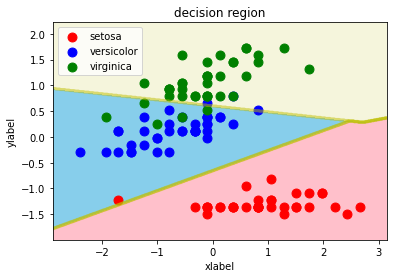

In [152]:
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'beige']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print (mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
      plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

#print (my_train.shape)
decision_region2(mx_train_standard, my_train, model_SVC_multi)